In [1]:
import os
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
path = 'data/kktv/'

In [2]:
pd.read_csv(path +'user_create_time.csv').tail()

,user_id,user_create_time
94246,94246,2016-08
94247,94247,2016-10
94248,94248,2017-06
94249,94249,2017-07
94250,94250,2017-05


In [52]:
def concat(x1, x2):
    for i in range(1,3):
        #46
        data = pd.read_csv(path +'{0:}-0{1:02d}.csv'.format(x1, i))

        if x2 == new_data:
            data.drop([x for x in data.columns if x not in ['user_id', 'event_time']], axis=1, inplace=True)
            data['event_time'] = pd.to_datetime(data.event_time)
            data['temp_week'] = pd.to_datetime(data.event_time).dt.week
            data['temp_day'] = pd.to_datetime(data.event_time).dt.dayofweek
            #data['month'] = pd.to_datetime(data.event_time).dt.month 
            data['hour'] = pd.to_datetime(data.event_time).dt.hour  
            #data['weekday'] = pd.to_datetime(data.event_time).dt.weekday
        else:
            pass
        x2.append(data)
    return pd.concat(x2)

def time_limit(x):
    x = x[(x.event_time >= datetime.datetime(2017, 1, 2, 1)) & \
                                (x.event_time < datetime.datetime(2017, 8, 14, 1))]
    return x

In [53]:
new_data = []
new_label = []

In [54]:
new_data_frame = concat('data', new_data)
new_label_frame = concat('label', new_label)

In [55]:
new_data_frame = time_limit(new_data_frame)

In [ ]:
#datetime.datetime(2017, 8, 14, 1) 
#d1 = datetime.datetime(2015, 9, 12, 13, 9, 45)
#d2 = pd.to_datetime(pd.Series(datetime.datetime(2015, 8, 29, 21, 10, 12)))
#pd.Series(datetime.datetime(2017,1,1)).dt.week
#pd.Series(datetime.datetime(2017,6,19)).dt.week

In [56]:
new_data_frame.head()

,user_id,event_time,temp_week,temp_day,hour
0,0,2017-06-08 14:54:30.325,23,3,14
1,0,2017-06-08 14:54:34.857,23,3,14
2,0,2017-06-08 14:54:36.730,23,3,14
3,0,2017-06-08 14:54:38.976,23,3,14
4,0,2017-06-08 14:54:40.373,23,3,14


In [57]:
day = []
week = []
for row in new_data_frame.itertuples():
    if ((row.hour >= 0) & (row.hour <1)):
        x = row.temp_day -1
        y = row.temp_week
        if x== -1:
            y-=1
            x=6
        else:
            pass
        day.append(x)
        week.append(y)
    else:
        day.append(row.temp_day)
        week.append(row.temp_week) 

slot = []
for row in new_data_frame.itertuples():
    if ((row.event_time.hour >= 1) & (row.event_time.hour <9)):
        slot.append('0')
    elif ((row.event_time.hour >= 9) & (row.event_time.hour <17)):
        slot.append('1')
    elif ((row.event_time.hour >= 17) & (row.event_time.hour <21)):
        slot.append('2')
    else:
        slot.append('3')
        
new_data_frame.loc[:, 'week']= week
new_data_frame.loc[:, 'day']= day
new_data_frame.loc[:, 'slot']= slot

In [58]:
new_data_frame[new_data_frame.slot=='3'].tail(100)

,user_id,event_time,temp_week,temp_day,hour,week,day,slot
1208326,2541,2017-06-15 00:55:25.933,24,3,0,24,2,3
1208327,2541,2017-06-15 00:59:28.587,24,3,0,24,2,3
1208366,2541,2017-06-16 00:21:15.752,24,4,0,24,3,3
1208367,2541,2017-06-16 00:42:28.748,24,4,0,24,3,3
1208368,2541,2017-06-16 00:52:43.075,24,4,0,24,3,3
1208405,2541,2017-06-18 22:43:20.217,24,6,22,24,6,3
1208406,2541,2017-06-18 23:11:43.311,24,6,23,24,6,3
1208407,2541,2017-06-18 23:12:02.233,24,6,23,24,6,3
1208408,2541,2017-06-18 23:14:35.623,24,6,23,24,6,3
1208409,2541,2017-06-18 23:18:37.955,24,6,23,24,6,3


In [59]:
new_data_frame.drop(['event_time', 'temp_day', 'temp_week'], axis=1, inplace=True)
new_data_frame.user_id = new_data_frame.user_id.astype(str)
new_data_frame.week = new_data_frame.week.astype(str)
new_data_frame.day = new_data_frame.day.astype(str)
new_data_frame.index = new_data_frame.index.map(int)
new_data_frame['time'] = new_data_frame.week + new_data_frame.day + new_data_frame.slot

new_label_frame.index = new_label_frame.index.map(int)
new_label_frame.user_id = new_label_frame.user_id.astype(str)

In [60]:
new_data_frame[new_data_frame.slot=='3'].tail(100)

,user_id,hour,week,day,slot,time
1208326,2541,0,24,2,3,2423
1208327,2541,0,24,2,3,2423
1208366,2541,0,24,3,3,2433
1208367,2541,0,24,3,3,2433
1208368,2541,0,24,3,3,2433
1208405,2541,22,24,6,3,2463
1208406,2541,23,24,6,3,2463
1208407,2541,23,24,6,3,2463
1208408,2541,23,24,6,3,2463
1208409,2541,23,24,6,3,2463


In [61]:
print len(new_data_frame.slot.unique())
new_data_frame.slot.unique()

4


array(['1', '0', '2', '3'], dtype=object)

In [62]:
print len(new_data_frame.week.unique())
new_data_frame.week.unique()

32


array(['23', '26', '32', '30', '21', '22', '24', '27', '28', '29', '31',
       '1', '2', '3', '4', '6', '7', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '25', '8', '9', '5'], dtype=object)

In [63]:
new_data_frame[new_data_frame.week=='52']

,user_id,hour,week,day,slot,time


In [64]:
new_data_frame.set_index('user_id', inplace=True)
new_label_frame.set_index('user_id', inplace=True)

In [65]:
new_data_frame.shape

(2308158, 5)

In [ ]:
'''
new_data_h5 = pd.HDFStore(path +'new_data.h5','w', complevel=4, complib='blosc')
new_data_h5['data'] = new_data_frame
new_data_h5.close()

new_label_h5 = pd.HDFStore(path +'new_label.h5','w', complevel=4, complib='blosc')
new_label_h5['data'] = new_label_frame
new_label_h5.close()
'''

In [ ]:
#new_data_frame.to_hdf('f.h5', 'table',append=True)
#new_label_frame.to_hdf('f.h5', 'table',append=True)
#new_test_frame.to_hdf('f.h5', 'table',append=True)

In [66]:
def extract_sessions(frame): 
    df_extracted_sessions = []
    for col in ['time']:
        for val in set(frame[col]):
            print 'Extracting frequency counts for (%s == %s)' % (col, val)
            tmp_df = frame.groupby(frame.index).apply(
                lambda group, x=col, y=val: np.sum(group[x] == y))
            tmp_df.name = '%s=%s' % (col, val)
            df_extracted_sessions.append(tmp_df)
    return pd.concat(df_extracted_sessions, axis=1)

final_data = extract_sessions(new_data_frame)

Extracting frequency counts for (time == 723)
Extracting frequency counts for (time == 1200)
Extracting frequency counts for (time == 452)
Extracting frequency counts for (time == 1160)
Extracting frequency counts for (time == 2553)
Extracting frequency counts for (time == 3250)
Extracting frequency counts for (time == 3251)
Extracting frequency counts for (time == 3252)
Extracting frequency counts for (time == 3253)
Extracting frequency counts for (time == 340)
Extracting frequency counts for (time == 341)
Extracting frequency counts for (time == 342)
Extracting frequency counts for (time == 343)
Extracting frequency counts for (time == 810)
Extracting frequency counts for (time == 811)
Extracting frequency counts for (time == 812)
Extracting frequency counts for (time == 813)
Extracting frequency counts for (time == 1253)
Extracting frequency counts for (time == 2910)
Extracting frequency counts for (time == 2911)
Extracting frequency counts for (time == 2912)
Extracting frequency co

In [67]:
final_data.head()
#final.columns.str[5:]
final_data.columns = final_data.columns.str[5:]

In [68]:
final_data = final_data.rename(columns=int).sort_index(axis=1)
final_data.index = final_data.index.map(int)
final_data.sort_index(axis=0, inplace=True)

In [92]:
bgg = final_data.join(new_label_frame, how='left')
print bgg.dtypes

100             int64
101             int64
102             int64
103             int64
110             int64
111             int64
112             int64
113             int64
120             int64
121             int64
122             int64
123             int64
130             int64
131             int64
132             int64
133             int64
140             int64
141             int64
142             int64
143             int64
150             int64
151             int64
152             int64
153             int64
160             int64
161             int64
162             int64
163             int64
200             int64
201             int64
                ...  
3262            int64
3263            int64
time_slot_0     int64
time_slot_1     int64
time_slot_2     int64
time_slot_3     int64
time_slot_4     int64
time_slot_5     int64
time_slot_6     int64
time_slot_7     int64
time_slot_8     int64
time_slot_9     int64
time_slot_10    int64
time_slot_11    int64
time_slot_

In [93]:
bgg.iloc[:, :896].head()

,100,101,102,103,110,111,112,113,120,121,...,3242,3243,3250,3251,3252,3253,3260,3261,3262,3263
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0,0,0,...,10,0,0,74,0,0,0,44,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
ss = StandardScaler()
bgg[bgg.columns[:896]] = ss.fit_transform(bgg[bgg.columns[:896]])
#final_training = final[~final.time_slot_27.isin([0,1])]
#final_training = bgg[bgg.time_slot_0.isnull()].iloc[:,:896].values.reshape(-1, 32, 28, 1)
#print final_training.shape

In [106]:
'''
concat_two_csv_h5 = pd.HDFStore(path +'concat_two_csv.h5','w', complevel=4, complib='blosc')
concat_two_csv_h5['data'] = bgg
concat_two_csv_h5.close()
'''

/Users/bgg/training_course/lib/python2.7/site-packages/ipykernel/__main__.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  from ipykernel import kernelapp as app


In [108]:
bgg =pd.read_hdf(path +'concat_two_csv.h5',key='data')

In [109]:
X = bgg[bgg.time_slot_0.notnull()].iloc[:,:896].values.reshape(-1, 32, 28, 1)
y = bgg[bgg.time_slot_0.notnull()].iloc[:,896:].values
print X.shape
print y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(2541, 32, 28, 1)
(2541, 28)


In [110]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import Callback, EarlyStopping

In [113]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=[32, 28, 1]))
#model.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1)))
model.add(MaxPooling2D(pool_size=(1, 4), strides=(1,1)))
#model.add(Dropout(0.25))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())
#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='sigmoid'))

In [114]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 25, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 25, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 25, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 24, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 31, 24, 64)        0         
__________

In [115]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [116]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [117]:
'''
class PlotAcc(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.val_acc = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.acc, label="acc")
        plt.plot(self.x, self.val_acc, label="val_acc")
        plt.legend()
        plt.show();
        
plot_acc = PlotAcc()
'''

'\nclass PlotAcc(Callback):\n    def on_train_begin(self, logs={}):\n        self.i = 0\n        self.x = []\n        self.acc = []\n        self.val_acc = []\n        \n        self.fig = plt.figure()\n        \n        self.logs = []\n\n    def on_epoch_end(self, epoch, logs={}):\n        \n        self.logs.append(logs)\n        self.x.append(self.i)\n        self.acc.append(logs.get(\'acc\'))\n        self.val_acc.append(logs.get(\'val_acc\'))\n        self.i += 1\n        \n        clear_output(wait=True)\n        plt.plot(self.x, self.acc, label="acc")\n        plt.plot(self.x, self.val_acc, label="val_acc")\n        plt.legend()\n        plt.show();\n        \nplot_acc = PlotAcc()\n'

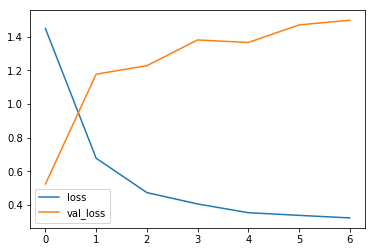

2032/2032 [==============================] - 161s - loss: 0.3221 - acc: 0.8906 - val_loss: 1.4985 - val_acc: 0.8999
('Test loss:', 1.4985288775037455)
('Test accuracy:', 0.8998737139645635)


In [118]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          callbacks=[plot_losses, early_stop],
          validation_data=(X_test, y_test))
#history = model.fit(X, y, epochs=400, batch_size=len(X), verbose=2)
# plot metrics
#pyplot.plot(history.history['acc'])
#pyplot.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [119]:
final_ans = model.predict(X_test)

In [120]:
from sklearn.metrics import roc_auc_score
#roc_auc_score(np.where(final_ans>0.5, 1, 0), y_test)
roc_auc_score(y_test, final_ans)

0.64362077773879067

In [ ]:
#model.save(path + 'kktv.h5')